# Exploratory Analysis Exercises
- Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire
import prepare


# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# aquire data
sales_merged = acquire.sales_merged()
sales_merged.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df = sales_merged.copy()

In [4]:
# prepare data
df = prepare.prep_sales(df)
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,total_sales
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


## Data Splitting

In [64]:
# find the years in the data
df.index.year.unique()

Int64Index([2013, 2014, 2015, 2016, 2017], dtype='int64', name='sale_date')

In [65]:
# set split to last year is used as test
train = df[:'2016'] # set includes observations from 2016
test = df['2017'] # set includes observations only from 2017
train.shape, test.shape

<ipython-input-65-a793bac511e3>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017'] # set includes observations only from 2017


((730500, 16), (182500, 16))

In [66]:
train.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,total_sales
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


## Visualizations

### Target Overtime

In [67]:
# set target to total_sales
sales = (train[['total_sales']])
sales.head()

,total_sales
sale_date,
2013-01-01 00:00:00+00:00,10.92
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00


<AxesSubplot:xlabel='sale_date'>

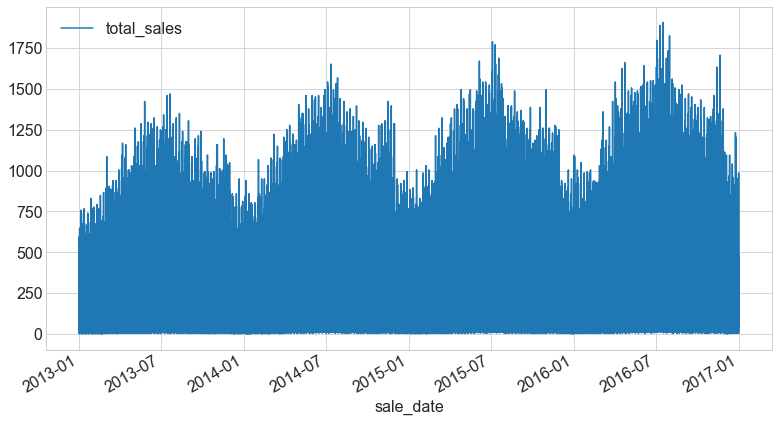

In [68]:
# plot sales
sales.plot()

<AxesSubplot:ylabel='Frequency'>

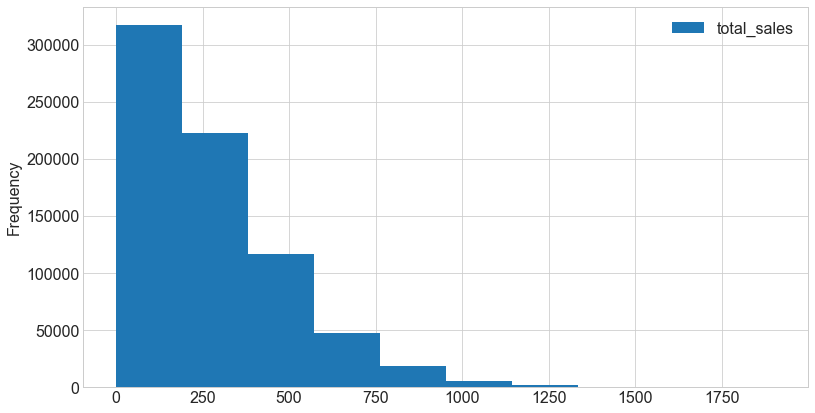

In [69]:
# plot distribution of sales
sales.plot.hist()

<AxesSubplot:>

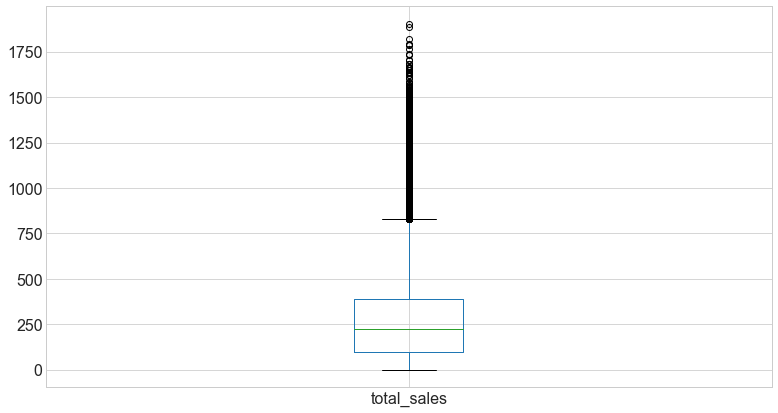

In [70]:
sales.boxplot()

### Visualize with Resample by Day

<AxesSubplot:xlabel='sale_date'>

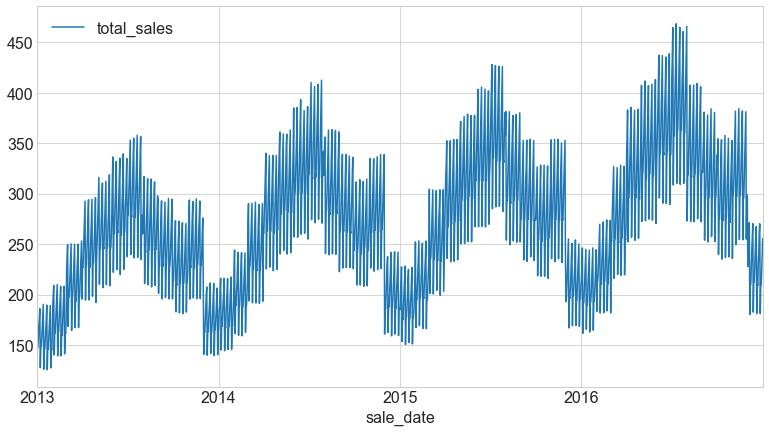

In [12]:
# plot by day
sales.resample('D').mean().plot()

<AxesSubplot:ylabel='Frequency'>

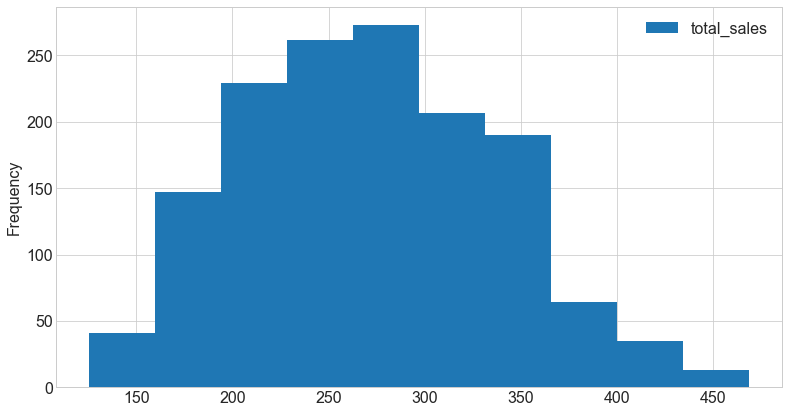

In [13]:
# viz histogram by day
sales.resample('D').mean().plot.hist()

<AxesSubplot:>

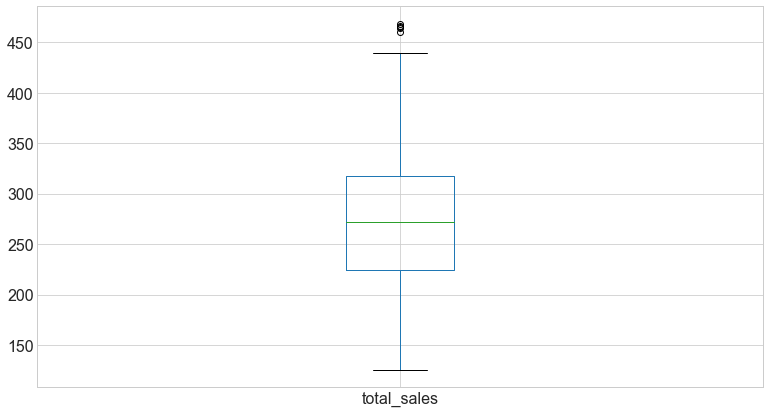

In [14]:
# viz boxplot by day
sales.resample('D').mean().boxplot()

### Visualize with Resample by Month

<AxesSubplot:xlabel='sale_date'>

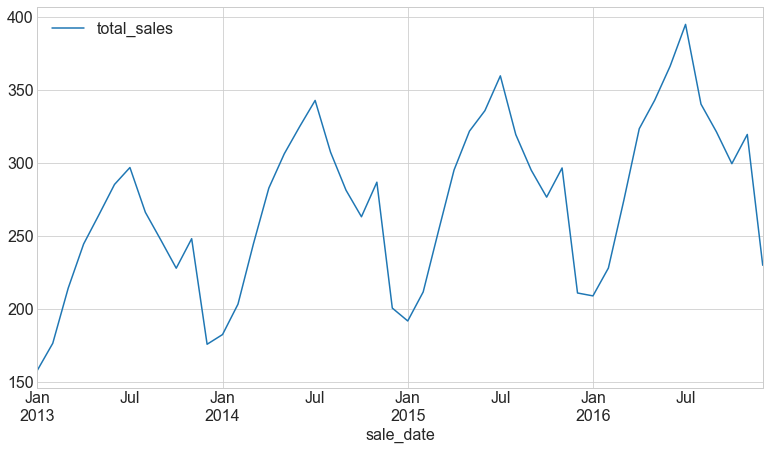

In [15]:
# viz plot by month
sales.resample('M').mean().plot()

<AxesSubplot:ylabel='Frequency'>

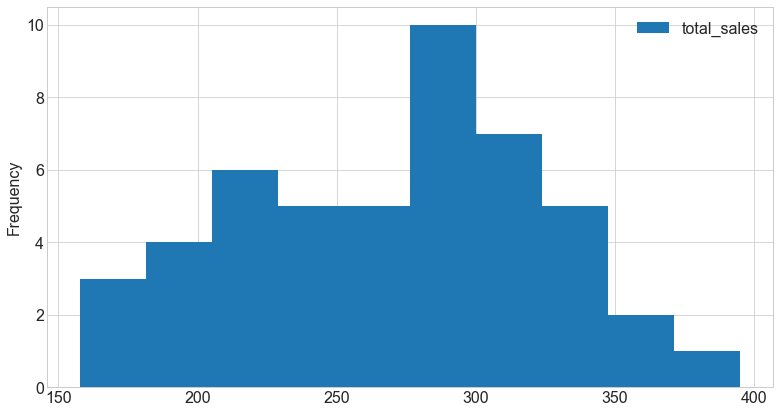

In [16]:
sales.resample('M').mean().plot.hist()

<AxesSubplot:>

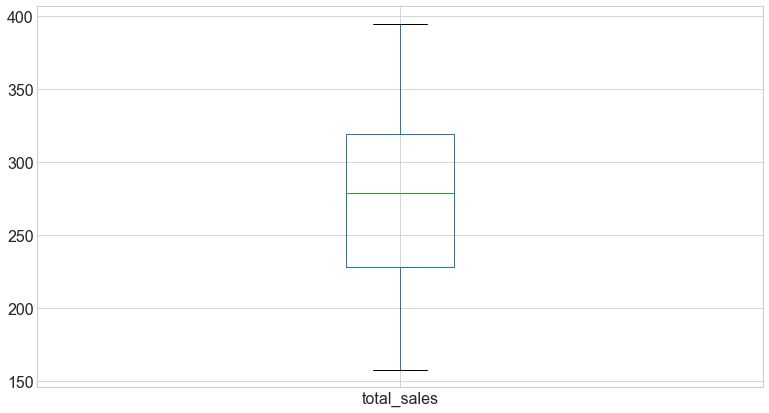

In [17]:
sales.resample('M').mean().boxplot()

# viz by year

<AxesSubplot:xlabel='sale_date'>

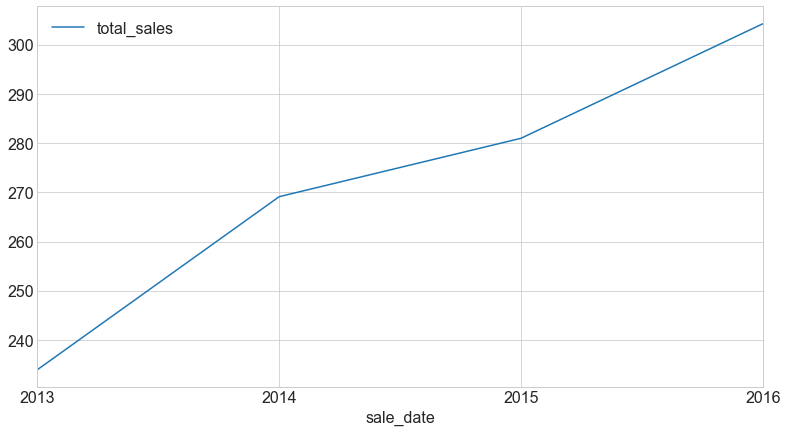

In [18]:
sales.resample('Y').mean().plot()

<AxesSubplot:ylabel='Frequency'>

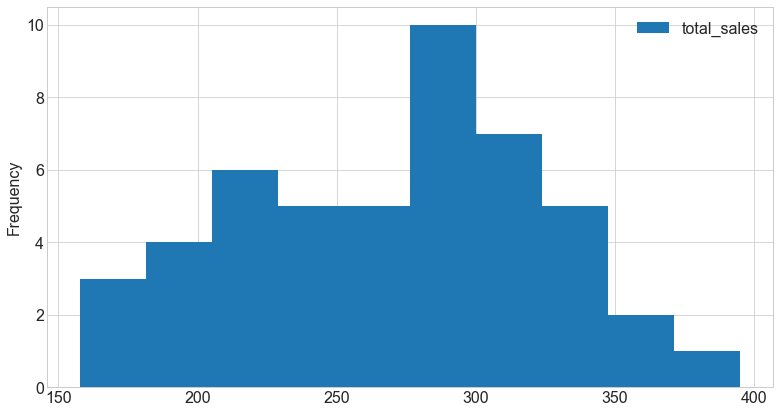

In [19]:
sales.resample('M').mean().plot.hist()

<AxesSubplot:>

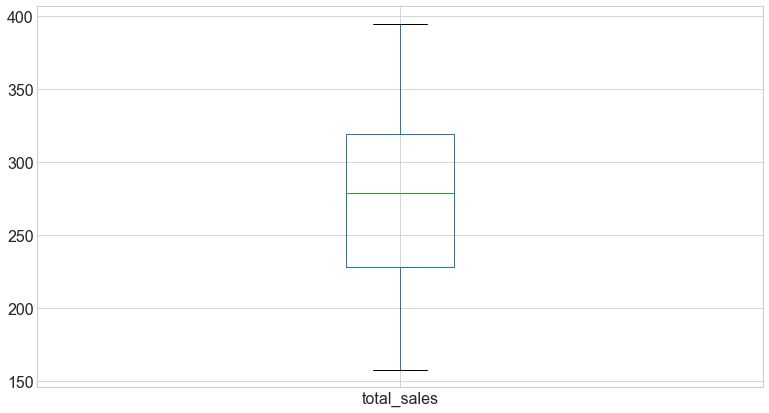

In [20]:
sales.resample('M').mean().boxplot()

[Text(0.5, 1.0, 'Average Total Sales per Weekday')]

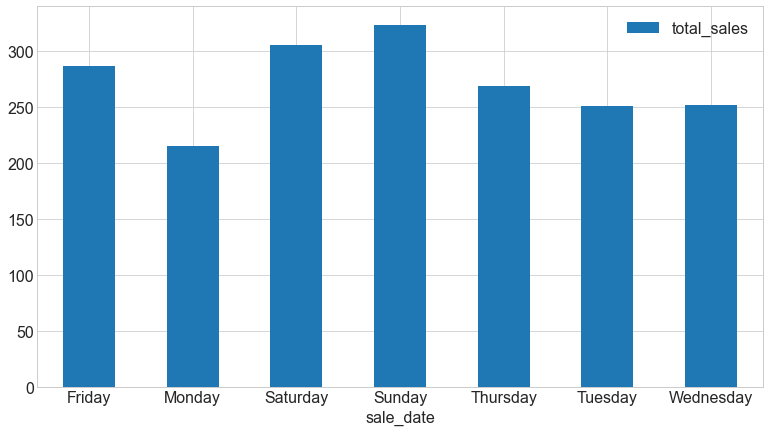

In [110]:
sales.groupby(sales.index.day_name()).mean().plot.bar()
plt.xticks(rotation=0)
ax.set(title='Average Total Sales per Weekday')

<AxesSubplot:xlabel='weekday', ylabel='total_sales'>

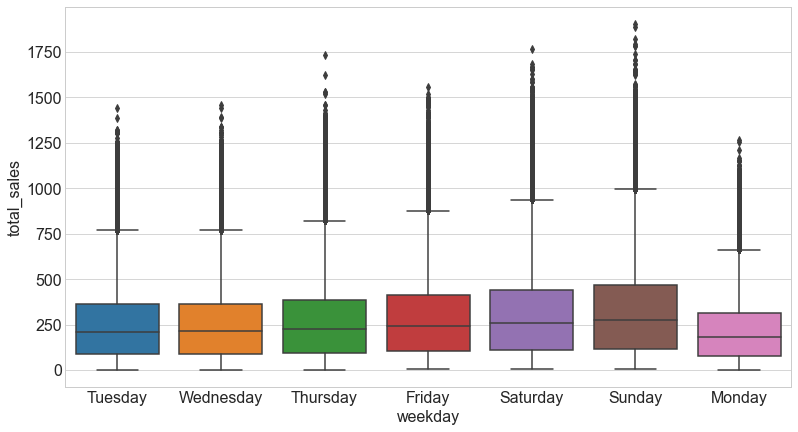

In [113]:
sales.assign(weekday=lambda sales: sales.index.day_name()).pipe((sns.boxplot, 'data'), y='total_sales', x='weekday')

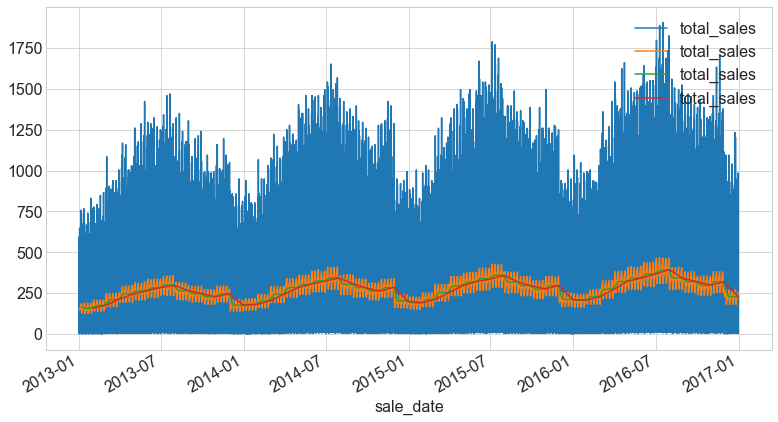

In [72]:
# viz plot together
ax = sales.plot(label="hourly")
sales.resample('D').mean().plot(ax=ax, label='daily')
sales.resample('W').mean().plot(ax=ax, label='weekly')
sales.resample('M').mean().plot(ax=ax, label='weekly')
ax.legend(loc = 'upper right')

In [75]:
# use describe by month
sales.groupby(sales.index.month).describe()

total_sales                                                        \
                count        mean         std   min     25%     50%     75%   
sale_date                                                                     
1             62000.0  185.232810  145.229766  0.00   66.23  159.40  268.15   
2             56500.0  205.001723  160.234470  1.68   73.06  176.22  295.74   
3             62000.0  246.694359  191.781349  3.00   89.10  212.39  354.38   
4             60000.0  286.463914  222.392366  5.04  103.59  247.26  411.60   
5             62000.0  308.932679  239.286350  5.04  112.40  267.24  444.86   
6             60000.0  328.098415  253.623315  5.04  119.07  283.65  472.29   
7             62000.0  348.595409  269.758461  5.88  126.36  301.32  503.40   
8             62000.0  308.319972  238.639841  4.20  112.40  267.00  443.44   
9             60000.0  286.252615  221.852486  4.20  103.62  247.59  411.60   
10            62000.0  266.773078  207.425551  3.36   96.16  228.80  384.48   
11            60000.0  287.761324  222.847403  4.20  104.16  248.40  414.70   
12            62000.0  204.265461  159.443617  0.84   73.06  176.19  294.15   

                    
               max  
sale_date           
1          1093.20  
2          1065.87  
3          1421.16  
4          1658.02  
5          1512.26  
6          1667.13  
7          1903.99  
8          1557.81  
9          1466.71  
10         1430.27  
11         1703.57  
12         1229.85

In [73]:
sales.groupby(sales.index.strftime('%m-%b'))

<AxesSubplot:xlabel='sale_date'>

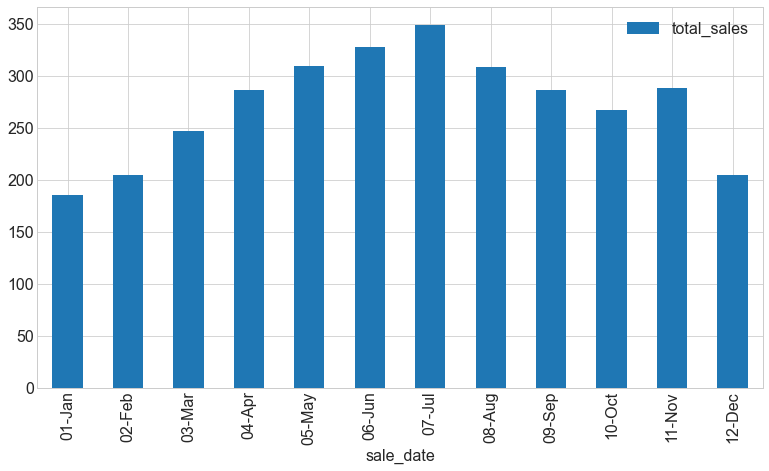

In [76]:
# Plot mean total_sales by month (bar plot)
sales.groupby(sales.index.strftime('%m-%b')).mean().plot.bar()

<AxesSubplot:xlabel='sale_date', ylabel='total_sales'>

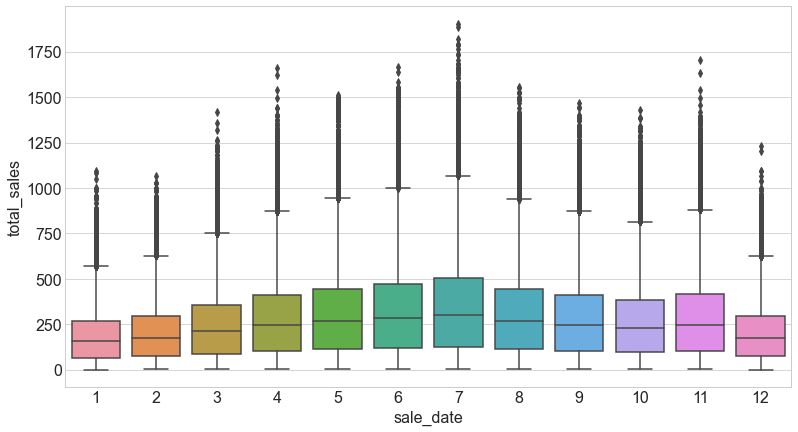

In [120]:
# box plot each month
sns.boxplot(x=sales.index.month, y=sales.total_sales)

### Change Overtime

<AxesSubplot:xlabel='sale_date'>

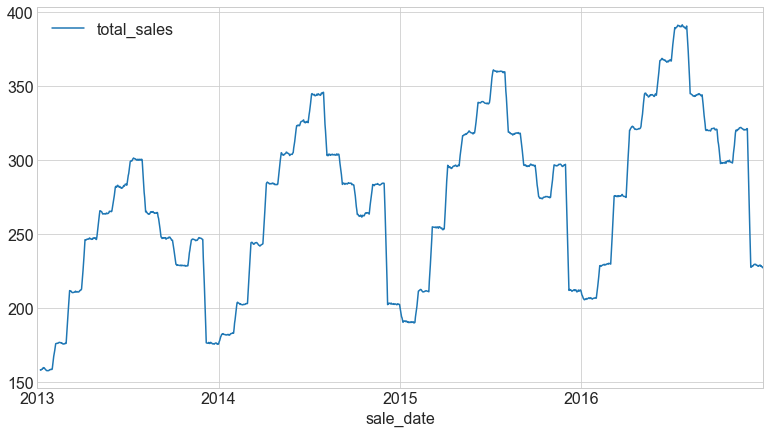

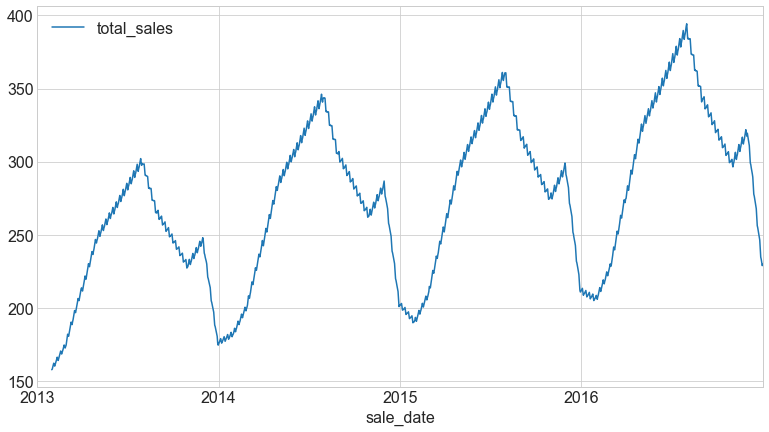

In [80]:
# use rolling average
sales.resample('D').mean().rolling(7).mean().plot(label='7 day rolling avg')
sales.resample('D').mean().rolling(30).mean().plot(label='30 day rolling avg')

In [81]:
# viz difference between current and previous value using diff()
sales.resample('D').mean().diff()

,total_sales
sale_date,
2013-01-01 00:00:00+00:00,NaN
2013-01-02 00:00:00+00:00,-0.54686
2013-01-03 00:00:00+00:00,9.19780
2013-01-04 00:00:00+00:00,12.59650
2013-01-05 00:00:00+00:00,6.30824
...,...
2016-12-27 00:00:00+00:00,26.11398
2016-12-28 00:00:00+00:00,3.31210
2016-12-29 00:00:00+00:00,15.81582


<AxesSubplot:title={'center':'average daily change of total_sales'}, xlabel='sale_date'>

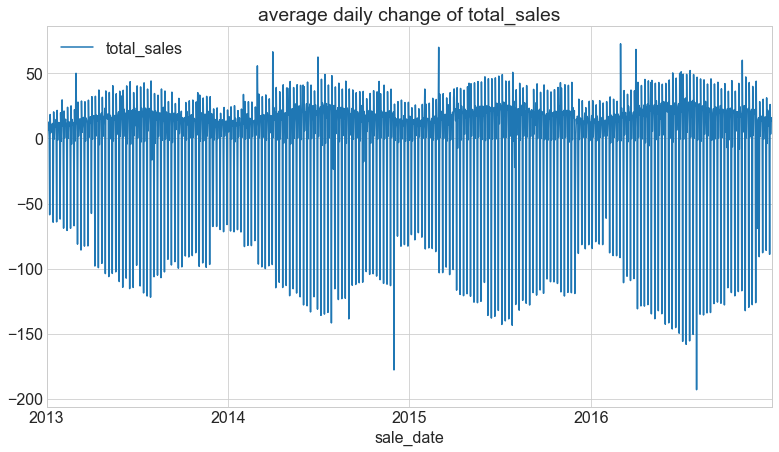

In [82]:
sales.resample('D').mean().diff().plot(title = 'average daily change of total_sales')

In [101]:
daily_sales = sales.resample('D').mean()
daily_sales.head()

,total_sales
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


Text(0, 0.5, 'Difference in Sales from One Day to the Next')

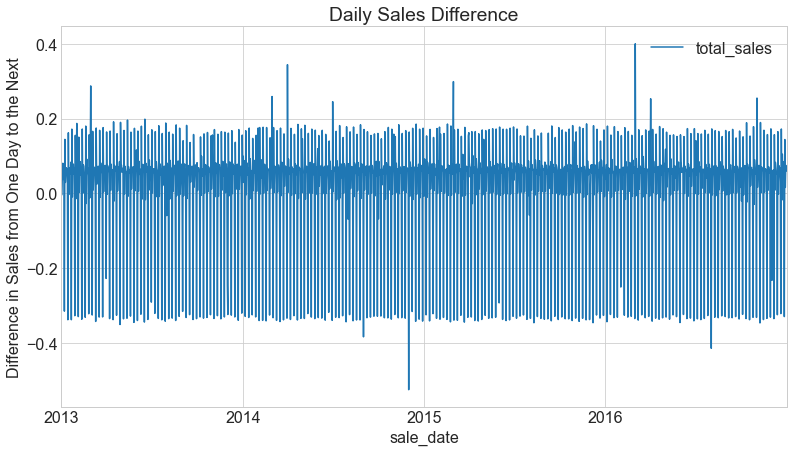

In [105]:
(daily_sales.diff() / daily_sales.shift()).plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in Sales from One Day to the Next')

<AxesSubplot:title={'center':'average weekly change of total_sales'}, xlabel='sale_date'>

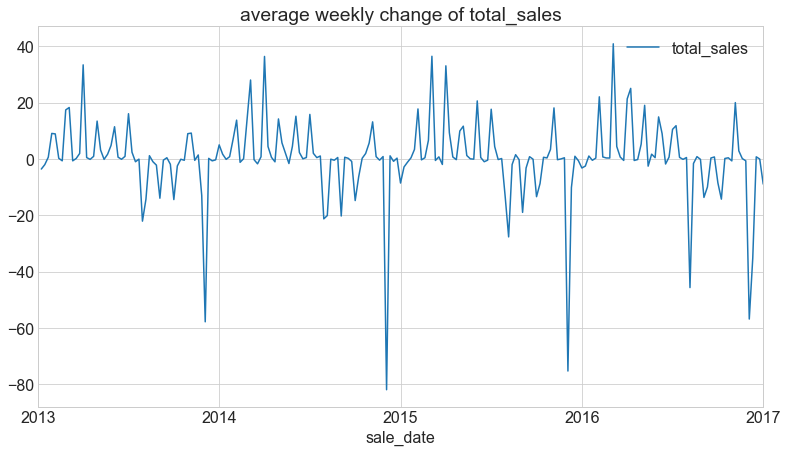

In [83]:
sales.resample('W').mean().diff().plot(title = 'average weekly change of total_sales')

<AxesSubplot:title={'center':'average monthly change of total_sales'}, xlabel='sale_date'>

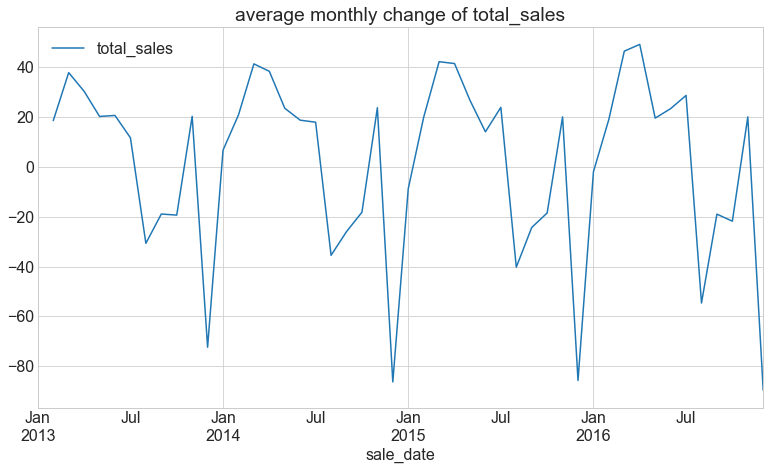

In [84]:
sales.resample('M').mean().diff().plot(title = 'average monthly change of total_sales')

### Seasonal Plot

In [85]:
# compare multiple years together
table = sales.groupby([sales.index.year, sales.index.month]).mean().unstack(0)
table

total_sales                                    
sale_date        2013        2014        2015        2016
sale_date                                                
1          157.894723  182.410791  191.725206  208.900519
2          176.411855  203.207122  211.589839  227.977512
3          214.181650  244.488991  253.739390  274.367406
4          244.460082  282.786091  295.147608  323.461873
5          264.663123  306.267538  321.813672  342.986382
6          285.261279  324.965376  335.850784  366.316222
7          296.881241  342.849100  359.698008  394.953287
8          266.183375  307.345466  319.435676  340.315372
9          247.237694  281.350430  295.088416  321.333920
10         227.868064  263.133772  276.572155  299.518321
11         248.108656  286.821036  296.583045  319.532559
12         175.753692  200.538977  210.886208  229.882967

<AxesSubplot:xlabel='sale_date'>

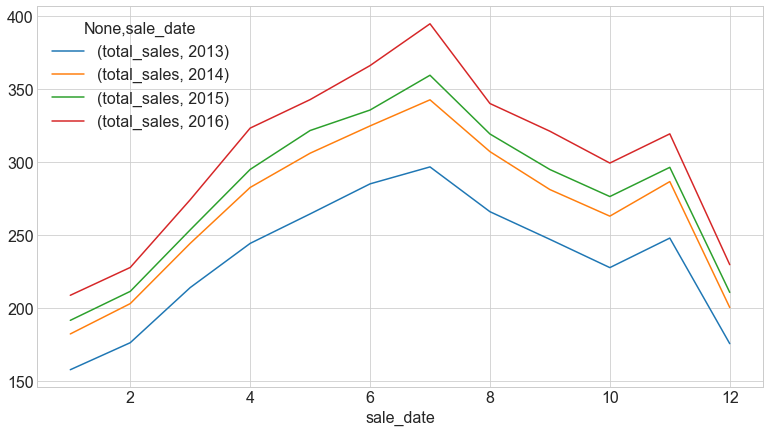

In [86]:
table.plot()

### Season Subseries Plot

In [87]:
# compare multiple years together
table = sales.groupby([sales.index.year, sales.index.month]).mean().unstack()
table

total_sales                                                  \
sale_date          1           2           3           4           5    
sale_date                                                               
2013       157.894723  176.411855  214.181650  244.460082  264.663123   
2014       182.410791  203.207122  244.488991  282.786091  306.267538   
2015       191.725206  211.589839  253.739390  295.147608  321.813672   
2016       208.900519  227.977512  274.367406  323.461873  342.986382   

                                                                       \
sale_date          6           7           8           9           10   
sale_date                                                               
2013       285.261279  296.881241  266.183375  247.237694  227.868064   
2014       324.965376  342.849100  307.345466  281.350430  263.133772   
2015       335.850784  359.698008  319.435676  295.088416  276.572155   
2016       366.316222  394.953287  340.315372  321.333920  299.518321   

                                   
sale_date          11          12  
sale_date                          
2013       248.108656  175.753692  
2014       286.821036  200.538977  
2015       296.583045  210.886208  
2016       319.532559  229.882967

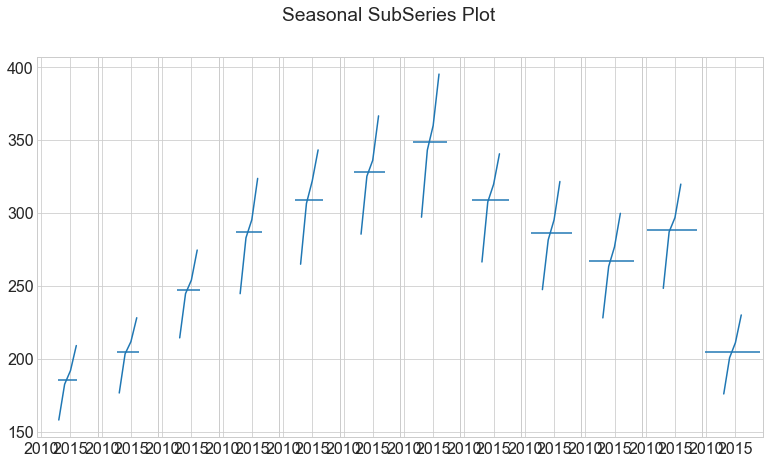

In [123]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax) #title=sales.index.month#
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
    
fig.suptitle('Seasonal SubSeries Plot') # title for overal figure
fig.subplots_adjust(wspace=0)

### Lag Plot

In [124]:
sales.shift(-1)

,total_sales
sale_date,
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00
2013-01-01 00:00:00+00:00,344.40
...,...
2016-12-31 00:00:00+00:00,92.07
2016-12-31 00:00:00+00:00,284.13
2016-12-31 00:00:00+00:00,53.38


Text(0.5, 1.0, 'Lag plot with Lag=1')

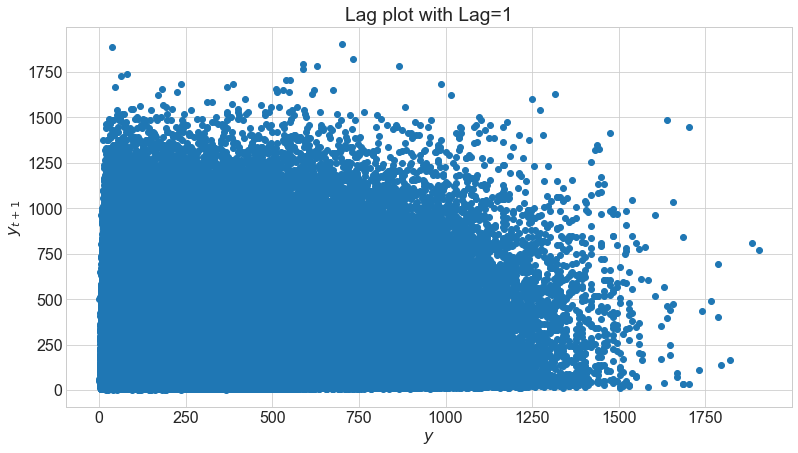

In [125]:
plt.scatter(sales, sales.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with Lag=1')

### Autocorrection Plot

### Seasonal Decomposition

### Categories Overtime